In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

DSR_Date = 20250213
MONTH_START_DATE = 20250201

brand = 'Slazenger'
#brand = 'HRX by Hrithik Roshan'

LY_START_DATE = MONTH_START_DATE - 10000 
LY_END_DATE = DSR_Date - 10000
data = pd.read_csv('../Files/DSR/PF SALES 14 FEB 2025.csv')
LY_data = pd.read_csv('../Files/DSR/2024 SALES/FEB 2024 PF BAGWise SALES ALL BRANDS.csv')
LY_data = LY_data[ (LY_data['order_created_date'] >= LY_START_DATE) & (LY_data['order_created_date'] <= LY_END_DATE)  ]

In [2]:
#Functions
def computeGM(dump):
    if len(dump) == 0:
        return 0
    else:
        rev = round((dump['revenue'].sum() / 10000000),2)
        return rev

def royaltyClean(royalty):
    if pd.isnull(royalty) == True:
        return 0
    else:
        return royalty

def computeGM_Percentage(dump):
    if len(dump) == 0:
        return 'NA'
    else:
        r = dump['revenue'].sum()
        p = dump['purchase_price'].sum()
        t = dump['tax'].sum()
        ro = dump['royalty'].sum()
        result = round( ((r-p-t-ro) / (r)),4 )
        return result

def computeTD_Percentage(dump):
    if len(dump) == 0:
        return 'NA'
    else:
        tmrp = dump['tot_mrp'].sum()
        r = dump['revenue'].sum()
        result = round( ((tmrp-r) / (tmrp)),4 )
        return result
        

Platform_GMV = round((data[data['order_created_date'] == DSR_Date]['revenue'].sum() / 10000000 ),4)

MFB_GMV = round((data[ (data['order_created_date'] == DSR_Date) & (data['brand_type'] == 'Private')]['revenue'].sum() / 10000000) , 4)

brand_GMV_MSA = round((data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) & (data['brand_type'] == 'Private') & (data['business_unit'] == "Men's Sports Apparel") ]['revenue'].sum() / 10000000) ,4)
brand_GMV_WSA = round((data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) & (data['brand_type'] == 'Private') & (data['business_unit'] == "Women's Sports Apparel") ]['revenue'].sum() / 10000000) ,4)
brand_GMV_KIDS = round((data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) & (data['brand_type'] == 'Private') & (data['business_unit'] == "Kids Wear") ]['revenue'].sum() / 10000000) ,4)
brand_GMV_SF = round((data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) & (data['brand_type'] == 'Private') & (data['business_unit'] == "Sports Footwear") ]['revenue'].sum() / 10000000) ,4)


PO_Wise_GMV = data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) & (data['brand_type'] == 'Private')
                       & ((data['business_unit'] == "Men's Sports Apparel") | (data['business_unit'] == "Women's Sports Apparel") ) ] 

brand_MP_GMV = round( (PO_Wise_GMV.groupby('po_type')['revenue'].sum() / 10000000) ,4)[0]
brand_OR_GMV = round( (PO_Wise_GMV.groupby('po_type')['revenue'].sum() / 10000000) ,4)[1]

temp = PO_Wise_GMV['revenue'].sum() / 10000000

brand_MP_Percentage = round((brand_MP_GMV / temp * 100))
brand_OR_Percentage = round((brand_OR_GMV / temp * 100))

data['royalty'] = data['royalty'].apply(royaltyClean)

brand_GM_Percentage_MSA = computeGM_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') & (data['business_unit'] == "Men's Sports Apparel") ]) 
brand_GM_Percentage_WSA = computeGM_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') & (data['business_unit'] == "Women's Sports Apparel") ]) 
brand_GM_Percentage_APPAREL = computeGM_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') & ((data['business_unit'] == "Women's Sports Apparel") | ((data['business_unit'] == "Men's Sports Apparel"))) ]) 
brand_GM_Percentage_KIDS =  computeGM_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') & (data['business_unit'] == "Kids Wear") ]) 
brand_GM_Percentage_SF =  computeGM_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') & (data['business_unit'] == "Sports Footwear") ]) 
brand_GM_Percentage =  computeGM_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') ]) 

brand_TD_Percentage_MSA = computeTD_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') & (data['business_unit'] == "Men's Sports Apparel") ]) 
brand_TD_Percentage_WSA = computeTD_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') & (data['business_unit'] == "Women's Sports Apparel") ]) 
brand_TD_Percentage_APPAREL = computeTD_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') & ((data['business_unit'] == "Women's Sports Apparel") | ((data['business_unit'] == "Men's Sports Apparel"))) ]) 
brand_TD_Percentage_KIDS =  computeTD_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') & (data['business_unit'] == "Kids Wear") ]) 
brand_TD_Percentage_SF =  computeTD_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') & (data['business_unit'] == "Sports Footwear") ]) 
brand_TD_Percentage =  computeTD_Percentage(data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) 
    & (data['brand_type'] == 'Private') ]) 

BU_MSA_GMV = round((data[  (data['order_created_date'] == DSR_Date)  & (data['business_unit'] == "Men's Sports Apparel") ]['revenue'].sum() / 10000000),2)
BU_WSA_GMV = round((data[  (data['order_created_date'] == DSR_Date)  & (data['business_unit'] == "Women's Sports Apparel") ]['revenue'].sum() / 10000000),2)
BU_SF_GMV = round((data[  (data['order_created_date'] == DSR_Date)  & (data['business_unit'] == "Sports Footwear") ]['revenue'].sum() / 10000000),2)

PLT_Actual_GM = computeGM_Percentage(data[data['order_created_date'] == DSR_Date])
MFB_Actual_GM = computeGM_Percentage(data[ ( data['order_created_date'] == DSR_Date ) & ( data['brand_type'] == 'Private' ) ])
PLT_BU_MSA_GM = computeGM_Percentage(data[ ( data['order_created_date'] == DSR_Date ) & (data['business_unit'] == "Men's Sports Apparel") ])
PLT_BU_WSA_GM = computeGM_Percentage(data[ ( data['order_created_date'] == DSR_Date ) & (data['business_unit'] == "Women's Sports Apparel") ])
PLT_BU_APPAREL_GM = computeGM_Percentage(data[ ( data['order_created_date'] == DSR_Date ) & 
                                     ( (data['business_unit'] == "Women's Sports Apparel") | (data['business_unit'] == "Men's Sports Apparel") ) ])
PLT_BU_SF_GM = computeGM_Percentage(data[ ( data['order_created_date'] == DSR_Date ) & (data['business_unit'] == "Sports Footwear") ])
PLT_BU_ACTUAL_GM = computeGM_Percentage(data[ ( data['order_created_date'] == DSR_Date ) & ( (data['business_unit'] == "Women's Sports Apparel") 
                                    | (data['business_unit'] == "Men's Sports Apparel") | (data['business_unit'] == "Sports Footwear")) ])

OR_PERFORMANCE_MSA = round((data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) & (data['brand_type'] == 'Private')
                       & (data['business_unit'] == "Men's Sports Apparel") & ( data['po_type'] == 'OR' )   ]['revenue'].sum() / 10000000 ),4 )
OR_PERFORMANCE_WSA = round((data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) & (data['brand_type'] == 'Private')
                       & (data['business_unit'] == "Women's Sports Apparel") & ( data['po_type'] == 'OR' )   ]['revenue'].sum() / 10000000 ),4 )

MP_PERFORMANCE_MSA = round((data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) & (data['brand_type'] == 'Private')
                       & (data['business_unit'] == "Men's Sports Apparel") & ( data['po_type'] == 'MP' )   ]['revenue'].sum() / 10000000 ),4 )
MP_PERFORMANCE_WSA = round((data[ (data['master_brand'] == brand) & (data['order_created_date'] == DSR_Date) & (data['brand_type'] == 'Private')
                       & (data['business_unit'] == "Women's Sports Apparel") & ( data['po_type'] == 'MP' )   ]['revenue'].sum() / 10000000 ),4 )

LY_data_MSA = LY_data[ (LY_data['master_brand'] == brand) & (LY_data['business_unit'] == "Men's Sports Apparel")  ]
LY_ACT_MTD_MSA_TSHIRTS_GMV = round((LY_data_MSA[  (LY_data_MSA['article_type'] == "Tshirts" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_MSA_TRACKPANTS_GMV = round((LY_data_MSA[  (LY_data_MSA['article_type'] == "Track Pants" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_MSA_SHORTS_GMV = round((LY_data_MSA[  (LY_data_MSA['article_type'] == "Shorts" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_MSA_TRACKSUITS_GMV = round((LY_data_MSA[  (LY_data_MSA['article_type'] == "Tracksuits" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_MSA_JACKETS_GMV = round((LY_data_MSA[  (LY_data_MSA['article_type'] == "Jackets" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_MSA_SWEATSHIRTS_GMV = round((LY_data_MSA[  (LY_data_MSA['article_type'] == "Sweatshirts" ) ]['revenue'].sum() / 10000000),2)

LY_data_WSA = LY_data[ (LY_data['master_brand'] == brand) & (LY_data['business_unit'] == "Women's Sports Apparel")  ]
LY_ACT_MTD_WSA_TSHIRTS_GMV = round((LY_data_WSA[  (LY_data_WSA['article_type'] == "Tshirts" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_WSA_TIGHTS_GMV = round((LY_data_WSA[  (LY_data_WSA['article_type'] == "Tights" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_WSA_TRACKPANTS_GMV = round((LY_data_WSA[  (LY_data_WSA['article_type'] == "Track Pants" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_WSA_BRA_GMV = round((LY_data_WSA[  (LY_data_WSA['article_type'] == "Bra" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_WSA_SHORTS_GMV = round((LY_data_WSA[  (LY_data_WSA['article_type'] == "Shorts" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_WSA_TOPS_GMV = round((LY_data_WSA[  (LY_data_WSA['article_type'] == "Tops" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_WSA_TRACKSUITS_GMV = round((LY_data_WSA[  (LY_data_WSA['article_type'] == "Tracksuits" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_WSA_JACKETS_GMV = round((LY_data_WSA[  (LY_data_WSA['article_type'] == "Jackets" ) ]['revenue'].sum() / 10000000),2)
LY_ACT_MTD_WSA_SWEATSHIRTS_GMV = round((LY_data_WSA[  (LY_data_WSA['article_type'] == "Sweatshirts" ) ]['revenue'].sum() / 10000000),2)

data_MSA = data[ (data['order_created_date'] <= DSR_Date) & (data['business_unit'] == "Men's Sports Apparel") & ( data['master_brand'] == brand ) ]
MTD_MSA_TSHIRTS_GMV = round((data_MSA[ (data_MSA['article_type'] == "Tshirts" ) ]['revenue'].sum() / 10000000),4)
MTD_MSA_TRACKPANTS_GMV = round((data_MSA[ (data_MSA['article_type'] == "Track Pants" ) ]['revenue'].sum() / 10000000),4)
MTD_MSA_Shorts_GMV = round((data_MSA[ (data_MSA['article_type'] == "Shorts" ) ]['revenue'].sum() / 10000000),4)
MTD_MSA_TRACKSUITS_GMV = round((data_MSA[ (data_MSA['article_type'] == "Tracksuits" ) ]['revenue'].sum() / 10000000),4)
MTD_MSA_JACKETS_GMV = round((data_MSA[ (data_MSA['article_type'] == "Jackets" ) ]['revenue'].sum() / 10000000),4)
MTD_MSA_SWEATSHIRTS_GMV = round((data_MSA[ (data_MSA['article_type'] == "Sweatshirts" ) ]['revenue'].sum() / 10000000),4)

data_WSA = data[ (data['order_created_date'] <= DSR_Date) & (data['business_unit'] == "Women's Sports Apparel") & ( data['master_brand'] == brand ) ]
MTD_WSA_TSHIRTS_GMV = round((data_WSA[ (data_WSA['article_type'] == "Tshirts" ) ]['revenue'].sum() / 10000000),4)
MTD_WSA_TIGHTS_GMV = round((data_WSA[ (data_WSA['article_type'] == "Tights" ) ]['revenue'].sum() / 10000000),4)
MTD_WSA_TRACKPANTS_GMV = round((data_WSA[ (data_WSA['article_type'] == "Track Pants" ) ]['revenue'].sum() / 10000000),4)
MTD_WSA_BRA_GMV = round((data_WSA[ (data_WSA['article_type'] == "Bra" ) ]['revenue'].sum() / 10000000),4)
MTD_WSA_SHORTS_GMV = round((data_WSA[ (data_WSA['article_type'] == "Shorts" ) ]['revenue'].sum() / 10000000),4)
MTD_WSA_TOPS_GMV = round((data_WSA[ (data_WSA['article_type'] == "Tops" ) ]['revenue'].sum() / 10000000),4)
MTD_WSA_TRACKSUITS_GMV = round((data_WSA[ (data_WSA['article_type'] == "Tracksuits" ) ]['revenue'].sum() / 10000000),4)
MTD_WSA_JACKETS_GMV = round((data_WSA[ (data_WSA['article_type'] == "Jackets" ) ]['revenue'].sum() / 10000000),4)
MTD_WSA_SWEATSHIRTS_GMV = round((data_WSA[ (data_WSA['article_type'] == "Sweatshirts" ) ]['revenue'].sum() / 10000000),4)

MTD_MSA_TSHIRTS_TD_PERCENTAGE     = computeTD_Percentage( data_MSA[ (data_MSA['article_type'] == "Tshirts" ) ] )
MTD_MSA_TRACKPANTS_TD_PERCENTAGE  = computeTD_Percentage( data_MSA[ (data_MSA['article_type'] == "Track Pants" ) ] )
MTD_MSA_SHORTS_TD_PERCENTAGE      = computeTD_Percentage( data_MSA[ (data_MSA['article_type'] == "Shorts" ) ] )
MTD_MSA_TRACKSUITS_TD_PERCENTAGE  = computeTD_Percentage( data_MSA[ (data_MSA['article_type'] == "Tracksuits" ) ] )
MTD_MSA_JACKETS_TD_PERCENTAGE     = computeTD_Percentage( data_MSA[ (data_MSA['article_type'] == "Jackets" ) ] )
MTD_MSA_SWEATSHIRTS_TD_PERCENTAGE = computeTD_Percentage( data_MSA[ (data_MSA['article_type'] == "Sweatshirts" ) ] )
MTD_MSA_OVERALL_TD_PERCENTAGE     = computeTD_Percentage( data_MSA )

MTD_MSA_TSHIRTS_GM_PERCENTAGE     = computeGM_Percentage( data_MSA[ (data_MSA['article_type'] == "Tshirts" ) ] )
MTD_MSA_TRACKPANTS_GM_PERCENTAGE  = computeGM_Percentage( data_MSA[ (data_MSA['article_type'] == "Track Pants" ) ] )
MTD_MSA_SHORTS_GM_PERCENTAGE      = computeGM_Percentage( data_MSA[ (data_MSA['article_type'] == "Shorts" ) ] )
MTD_MSA_TRACKSUITS_GM_PERCENTAGE  = computeGM_Percentage( data_MSA[ (data_MSA['article_type'] == "Tracksuits" ) ] )
MTD_MSA_JACKETS_GM_PERCENTAGE     = computeGM_Percentage( data_MSA[ (data_MSA['article_type'] == "Jackets" ) ] )
MTD_MSA_SWEATSHIRTS_GM_PERCENTAGE = computeGM_Percentage( data_MSA[ (data_MSA['article_type'] == "Sweatshirts" ) ] )
MTD_MSA_OVERALL_GM_PERCENTAGE     = computeGM_Percentage( data_MSA )

MTD_WSA_TSHIRTS_TD_PERCENTAGE     = computeTD_Percentage( data_WSA[ (data_WSA['article_type'] == "Tshirts" ) ] )
MTD_WSA_TIGHTS_TD_PERCENTAGE      = computeTD_Percentage( data_WSA[ (data_WSA['article_type'] == "Tights" ) ] )
MTD_WSA_TRACKPANTS_TD_PERCENTAGE  = computeTD_Percentage( data_WSA[ (data_WSA['article_type'] == "Track Pants" ) ] )
MTD_WSA_BRA_TD_PERCENTAGE         = computeTD_Percentage( data_WSA[ (data_WSA['article_type'] == "Bra" ) ] )
MTD_WSA_SHORTS_TD_PERCENTAGE      = computeTD_Percentage( data_WSA[ (data_WSA['article_type'] == "Shorts" ) ] )
MTD_WSA_TOPS_TD_PERCENTAGE        = computeTD_Percentage( data_WSA[ (data_WSA['article_type'] == "Tops" ) ] )
MTD_WSA_TRACKSUITS_TD_PERCENTAGE  = computeTD_Percentage( data_WSA[ (data_WSA['article_type'] == "Tracksuits" ) ] )
MTD_WSA_JACKETS_TD_PERCENTAGE     = computeTD_Percentage( data_WSA[ (data_WSA['article_type'] == "Jackets" ) ] )
MTD_WSA_SWEATSHIRTS_TD_PERCENTAGE = computeTD_Percentage( data_WSA[ (data_WSA['article_type'] == "Sweatshirts" ) ] )
MTD_WSA_OVERALL_TD_PERCENTAGE     = computeTD_Percentage( data_WSA )

MTD_WSA_TSHIRTS_GM_PERCENTAGE     = computeGM_Percentage( data_WSA[ (data_WSA['article_type'] == "Tshirts" ) ] )
MTD_WSA_TIGHTS_GM_PERCENTAGE      = computeGM_Percentage( data_WSA[ (data_WSA['article_type'] == "Tights" ) ] )
MTD_WSA_TRACKPANTS_GM_PERCENTAGE  = computeGM_Percentage( data_WSA[ (data_WSA['article_type'] == "Track Pants" ) ] )
MTD_WSA_BRA_GM_PERCENTAGE         = computeGM_Percentage( data_WSA[ (data_WSA['article_type'] == "Bra" ) ] )
MTD_WSA_SHORTS_GM_PERCENTAGE      = computeGM_Percentage( data_WSA[ (data_WSA['article_type'] == "Shorts" ) ] )
MTD_WSA_TOPS_GM_PERCENTAGE      = computeGM_Percentage( data_WSA[ (data_WSA['article_type'] == "Tops" ) ] )
MTD_WSA_TRACKSUITS_GM_PERCENTAGE  = computeGM_Percentage( data_WSA[ (data_WSA['article_type'] == "Tracksuits" ) ] )
MTD_WSA_JACKETS_GM_PERCENTAGE     = computeGM_Percentage( data_WSA[ (data_WSA['article_type'] == "Jackets" ) ] )
MTD_WSA_SWEATSHIRTS_GM_PERCENTAGE = computeGM_Percentage( data_WSA[ (data_WSA['article_type'] == "Sweatshirts" ) ] )
MTD_WSA_OVERALL_GM_PERCENTAGE     = computeGM_Percentage( data_WSA )

metrics = {
    'Metric' : 
["Date","Brand","Platform GMV","MFB GMV","GMV MSA","GMV WSA","GMV SF","MP GMV","OR GMV","OR% Rev Mix",
 "MP% Rev Mix","GM% MSA","GM% WSA","GM% APPAREL","GM% KIDS","GM% SF","GM% Overall","TD% MSA","TD% WSA","TD% APPAREL","TD% KIDS",
 "TD% SF","TD% Overall" ,"BU MSA GMV","BU WSA GMV","BU SF GMV", "PLT Actual GM%","MFB Actual GM%","Platform & BU MSA GM%",
 "Platform & BU WSA GM%","Platform & BU APPAREL GM%","Platform & BU SF GM%","Platform & BU - Total BU Actual GM%",
 "OR PERFORMACE MSA GMV","OR PERFORMACE WSA GMV","MP PERFORMACE MSA GMV","MP PERFORMACE WSA GMV"],
    'Values' : 
[DSR_Date,brand,Platform_GMV,MFB_GMV,brand_GMV_MSA,brand_GMV_WSA,brand_GMV_SF,brand_MP_GMV,brand_OR_GMV,brand_OR_Percentage,
 brand_MP_Percentage,brand_GM_Percentage_MSA,brand_GM_Percentage_WSA,brand_GM_Percentage_APPAREL,brand_GM_Percentage_KIDS,
 brand_GM_Percentage_SF,brand_GM_Percentage,brand_TD_Percentage_MSA,brand_TD_Percentage_WSA,brand_TD_Percentage_APPAREL,brand_TD_Percentage_KIDS,
 brand_TD_Percentage_SF,brand_TD_Percentage,BU_MSA_GMV ,BU_WSA_GMV,BU_SF_GMV,PLT_Actual_GM,MFB_Actual_GM,PLT_BU_MSA_GM,
 PLT_BU_WSA_GM, PLT_BU_APPAREL_GM, PLT_BU_SF_GM, PLT_BU_ACTUAL_GM,OR_PERFORMANCE_MSA,OR_PERFORMANCE_WSA,MP_PERFORMANCE_MSA,
 MP_PERFORMANCE_WSA]
}
df = pd.DataFrame(metrics).set_index('Metric')

HRX_MTD = [
    [MTD_MSA_TSHIRTS_GMV    ,LY_ACT_MTD_MSA_TSHIRTS_GMV    ,MTD_MSA_TSHIRTS_TD_PERCENTAGE    ,MTD_MSA_TSHIRTS_GM_PERCENTAGE],
    [MTD_MSA_TRACKPANTS_GMV ,LY_ACT_MTD_MSA_TRACKPANTS_GMV ,MTD_MSA_TRACKPANTS_TD_PERCENTAGE ,MTD_MSA_TRACKPANTS_GM_PERCENTAGE],
    [MTD_MSA_Shorts_GMV     ,LY_ACT_MTD_MSA_SHORTS_GMV     ,MTD_MSA_SHORTS_TD_PERCENTAGE     ,MTD_MSA_SHORTS_GM_PERCENTAGE],
    [MTD_MSA_TRACKSUITS_GMV ,LY_ACT_MTD_MSA_TRACKSUITS_GMV ,MTD_MSA_TRACKSUITS_TD_PERCENTAGE ,MTD_MSA_TRACKSUITS_GM_PERCENTAGE],
    [MTD_MSA_JACKETS_GMV    ,LY_ACT_MTD_MSA_JACKETS_GMV    ,MTD_MSA_JACKETS_TD_PERCENTAGE    ,MTD_MSA_JACKETS_GM_PERCENTAGE],
    [MTD_MSA_SWEATSHIRTS_GMV,LY_ACT_MTD_MSA_SWEATSHIRTS_GMV,MTD_MSA_SWEATSHIRTS_TD_PERCENTAGE,MTD_MSA_SWEATSHIRTS_GM_PERCENTAGE],
    ['-'                    ,'-'                           ,MTD_MSA_OVERALL_TD_PERCENTAGE    ,MTD_MSA_OVERALL_GM_PERCENTAGE],
    [MTD_WSA_TSHIRTS_GMV    ,LY_ACT_MTD_WSA_TSHIRTS_GMV    ,MTD_WSA_TSHIRTS_TD_PERCENTAGE    ,MTD_WSA_TSHIRTS_GM_PERCENTAGE],
    [MTD_WSA_TIGHTS_GMV     ,LY_ACT_MTD_WSA_TIGHTS_GMV     ,MTD_WSA_TIGHTS_TD_PERCENTAGE     ,MTD_WSA_TIGHTS_GM_PERCENTAGE],
    [MTD_WSA_TRACKPANTS_GMV ,LY_ACT_MTD_WSA_TRACKPANTS_GMV ,MTD_WSA_TRACKPANTS_TD_PERCENTAGE ,MTD_WSA_TRACKPANTS_GM_PERCENTAGE],
    [MTD_WSA_BRA_GMV        ,LY_ACT_MTD_WSA_BRA_GMV        ,MTD_WSA_BRA_TD_PERCENTAGE        ,MTD_WSA_BRA_GM_PERCENTAGE],
    [MTD_WSA_SHORTS_GMV     ,LY_ACT_MTD_WSA_SHORTS_GMV     ,MTD_WSA_SHORTS_TD_PERCENTAGE     ,MTD_WSA_SHORTS_GM_PERCENTAGE],
    [MTD_WSA_TRACKSUITS_GMV ,LY_ACT_MTD_WSA_TRACKSUITS_GMV ,MTD_WSA_TRACKSUITS_TD_PERCENTAGE ,MTD_WSA_TRACKSUITS_GM_PERCENTAGE],
    [MTD_WSA_JACKETS_GMV    ,LY_ACT_MTD_WSA_JACKETS_GMV    ,MTD_WSA_JACKETS_TD_PERCENTAGE    ,MTD_WSA_JACKETS_GM_PERCENTAGE],
    [MTD_WSA_SWEATSHIRTS_GMV,LY_ACT_MTD_WSA_SWEATSHIRTS_GMV,MTD_WSA_SWEATSHIRTS_TD_PERCENTAGE,MTD_WSA_SWEATSHIRTS_GM_PERCENTAGE],
    ['-'                    ,'-'                           ,MTD_WSA_OVERALL_TD_PERCENTAGE    ,MTD_WSA_OVERALL_GM_PERCENTAGE]
]

HRX_BAG_Wise = pd.DataFrame(HRX_MTD, columns=['GMV ACT','LY GMV ACT','TD%','GM%'], index=['MSA-Tshirts','MSA-TrackPants','MSA-Shorts','MSA-TrackSuits',
                'MSA-Jackets','MSA-SweatShirts','MSA-Overall','WSA-Tshirts','WSA-Tights','WSA-TrackPants',
                'WSA-Bra','WSA-Shorts','WSA-TrackSuits','WSA-Jackets','WSA-SweatShirts','WSA-Overall'])

SLAZENGER_MTD = [
    [MTD_MSA_TSHIRTS_GMV    ,LY_ACT_MTD_MSA_TSHIRTS_GMV    ,MTD_MSA_TSHIRTS_TD_PERCENTAGE    ,MTD_MSA_TSHIRTS_GM_PERCENTAGE],
    [MTD_MSA_TRACKPANTS_GMV ,LY_ACT_MTD_MSA_TRACKPANTS_GMV ,MTD_MSA_TRACKPANTS_TD_PERCENTAGE ,MTD_MSA_TRACKPANTS_GM_PERCENTAGE],
    [MTD_MSA_Shorts_GMV     ,LY_ACT_MTD_MSA_SHORTS_GMV     ,MTD_MSA_SHORTS_TD_PERCENTAGE     ,MTD_MSA_SHORTS_GM_PERCENTAGE],
    [MTD_MSA_TRACKSUITS_GMV ,LY_ACT_MTD_MSA_TRACKSUITS_GMV ,MTD_MSA_TRACKSUITS_TD_PERCENTAGE ,MTD_MSA_TRACKSUITS_GM_PERCENTAGE],
    [MTD_MSA_JACKETS_GMV    ,LY_ACT_MTD_MSA_JACKETS_GMV    ,MTD_MSA_JACKETS_TD_PERCENTAGE    ,MTD_MSA_JACKETS_GM_PERCENTAGE],
    [MTD_MSA_SWEATSHIRTS_GMV,LY_ACT_MTD_MSA_SWEATSHIRTS_GMV,MTD_MSA_SWEATSHIRTS_TD_PERCENTAGE,MTD_MSA_SWEATSHIRTS_GM_PERCENTAGE],
    ['-'                    ,'-'                           ,MTD_MSA_OVERALL_TD_PERCENTAGE    ,MTD_MSA_OVERALL_GM_PERCENTAGE],
    [MTD_WSA_TSHIRTS_GMV    ,LY_ACT_MTD_WSA_TSHIRTS_GMV    ,MTD_WSA_TSHIRTS_TD_PERCENTAGE    ,MTD_WSA_TSHIRTS_GM_PERCENTAGE],
    [MTD_WSA_TIGHTS_GMV     ,LY_ACT_MTD_WSA_TIGHTS_GMV     ,MTD_WSA_TIGHTS_TD_PERCENTAGE     ,MTD_WSA_TIGHTS_GM_PERCENTAGE],
    [MTD_WSA_TRACKPANTS_GMV ,LY_ACT_MTD_WSA_TRACKPANTS_GMV ,MTD_WSA_TRACKPANTS_TD_PERCENTAGE ,MTD_WSA_TRACKPANTS_GM_PERCENTAGE],
    [MTD_WSA_TOPS_GMV       ,LY_ACT_MTD_WSA_TOPS_GMV       ,MTD_WSA_TOPS_TD_PERCENTAGE       ,MTD_WSA_TOPS_GM_PERCENTAGE],
    [MTD_WSA_JACKETS_GMV    ,LY_ACT_MTD_WSA_JACKETS_GMV    ,MTD_WSA_JACKETS_TD_PERCENTAGE    ,MTD_WSA_JACKETS_GM_PERCENTAGE],
    ['-'                    ,'-'                           ,MTD_WSA_OVERALL_TD_PERCENTAGE    ,MTD_WSA_OVERALL_GM_PERCENTAGE]
]

SLAZENGER_BAG_Wise = pd.DataFrame(SLAZENGER_MTD, columns=['GMV ACT','LY GMV ACT','TD%','GM%'], index=['MSA-Tshirts','MSA-TrackPants','MSA-Shorts','MSA-TrackPants',
                'MSA-Jackets','MSA-SweatShirts','MSA-Overall','WSA-Tshirts','WSA-Tights','WSA-TrackPants','WSA-Tops','WSA-Jackets','WSA-Overall'])

OR_data = data[ (data['master_brand'] == brand) & ( (data['business_unit'] == "Men's Sports Apparel") | (data['business_unit'] == "Women's Sports Apparel") ) & ( (data['gender'] == "Men") | (data['gender'] == "Women") ) & ( data['po_type'] == 'OR' )]
LY_OR_data = LY_data[ (LY_data['master_brand'] == brand) & ( (LY_data['business_unit'] == "Men's Sports Apparel") | (LY_data['business_unit'] == "Women's Sports Apparel") ) & ( (LY_data['gender'] == "Men") | (LY_data['gender'] == "Women") ) & ( LY_data['po_type'] == 'OR' )]
MP_data = data[ (data['master_brand'] == brand) & ( (data['business_unit'] == "Men's Sports Apparel") | (data['business_unit'] == "Women's Sports Apparel") ) & ( (data['gender'] == "Men") | (data['gender'] == "Women") ) & ( data['po_type'] == 'MP' )]
LY_MP_data = LY_data[ (LY_data['master_brand'] == brand) & ( (LY_data['business_unit'] == "Men's Sports Apparel") | (LY_data['business_unit'] == "Women's Sports Apparel") ) & ( (LY_data['gender'] == "Men") | (LY_data['gender'] == "Women") ) & ( LY_data['po_type'] == 'MP' )]
##########################################################################################################################################
MSA_TSHIRTS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Men's Sports Apparel") & (OR_data['article_type'] == "Tshirts") ] )
MSA_TRACKPANTS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Men's Sports Apparel") & (OR_data['article_type'] == "Track Pants") ] )
MSA_SHORTS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Men's Sports Apparel") & (OR_data['article_type'] == "Shorts") ] )
MSA_TRACKSUITS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Men's Sports Apparel") & (OR_data['article_type'] == "Tracksuits") ] )
MSA_JACKETS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Men's Sports Apparel") & (OR_data['article_type'] == "Jackets") ] )
MSA_SWEATSHIRTS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Men's Sports Apparel") & (OR_data['article_type'] == "Sweatshirts") ] )
LY_MSA_TSHIRTS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Men's Sports Apparel") & (LY_OR_data['article_type'] == "Tshirts") ] )
LY_MSA_TRACKPANTS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Men's Sports Apparel") & (LY_OR_data['article_type'] == "Track Pants") ] )
LY_MSA_SHORTS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Men's Sports Apparel") & (LY_OR_data['article_type'] == "Shorts") ] )
LY_MSA_TRACKSUITS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Men's Sports Apparel") & (LY_OR_data['article_type'] == "Tracksuits") ] )
LY_MSA_JACKETS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Men's Sports Apparel") & (LY_OR_data['article_type'] == "Jackets") ] )
LY_MSA_SWEATSHIRTS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Men's Sports Apparel") & (LY_OR_data['article_type'] == "Sweatshirts") ] )


MSA_TSHIRTS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Men's Sports Apparel") & (MP_data['article_type'] == "Tshirts") ] )
MSA_TRACKPANTS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Men's Sports Apparel") & (MP_data['article_type'] == "Track Pants") ] )
MSA_SHORTS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Men's Sports Apparel") & (MP_data['article_type'] == "Shorts") ] )
MSA_TRACKSUITS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Men's Sports Apparel") & (MP_data['article_type'] == "Tracksuits") ] )
MSA_JACKETS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Men's Sports Apparel") & (MP_data['article_type'] == "Jackets") ] )
MSA_SWEATSHIRTS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Men's Sports Apparel") & (MP_data['article_type'] == "Sweatshirts") ] )
LY_MSA_TSHIRTS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Men's Sports Apparel") & (LY_MP_data['article_type'] == "Tshirts") ] )
LY_MSA_TRACKPANTS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Men's Sports Apparel") & (LY_MP_data['article_type'] == "Track Pants") ] )
LY_MSA_SHORTS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Men's Sports Apparel") & (LY_MP_data['article_type'] == "Shorts") ] )
LY_MSA_TRACKSUITS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Men's Sports Apparel") & (LY_MP_data['article_type'] == "Tracksuits") ] )
LY_MSA_JACKETS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Men's Sports Apparel") & (LY_MP_data['article_type'] == "Jackets") ] )
LY_MSA_SWEATSHIRTS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Men's Sports Apparel") & (LY_MP_data['article_type'] == "Sweatshirts") ] )
#############################################################################################################################################
WSA_TSHIRTS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Women's Sports Apparel") & (OR_data['article_type'] == "Tshirts") ] )
WSA_TRACKPANTS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Women's Sports Apparel") & (OR_data['article_type'] == "Track Pants") ] )
WSA_BRA_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Women's Sports Apparel") & (OR_data['article_type'] == "Bra") ] )
WSA_SHORTS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Women's Sports Apparel") & (OR_data['article_type'] == "Shorts") ] )
WSA_TRACKSUITS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Women's Sports Apparel") & (OR_data['article_type'] == "Tracksuits") ] )
WSA_JACKETS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Women's Sports Apparel") & (OR_data['article_type'] == "Jackets") ] )
WSA_SWEATSHIRTS_GMV_OR = computeGM(OR_data[ (OR_data['business_unit'] == "Women's Sports Apparel") & (OR_data['article_type'] == "Sweatshirts") ] )
LY_WSA_TSHIRTS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Women's Sports Apparel") & (LY_OR_data['article_type'] == "Tshirts") ] )
LY_WSA_TRACKPANTS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Women's Sports Apparel") & (LY_OR_data['article_type'] == "Track Pants") ] )
LY_WSA_BRA_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Women's Sports Apparel") & (LY_OR_data['article_type'] == "Bra") ] )
LY_WSA_SHORTS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Women's Sports Apparel") & (LY_OR_data['article_type'] == "Shorts") ] )
LY_WSA_TRACKSUITS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Women's Sports Apparel") & (LY_OR_data['article_type'] == "Tracksuits") ] )
LY_WSA_JACKETS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Women's Sports Apparel") & (LY_OR_data['article_type'] == "Jackets") ] )
LY_WSA_SWEATSHIRTS_GMV_OR = computeGM(LY_OR_data[ (LY_OR_data['business_unit'] == "Women's Sports Apparel") & (LY_OR_data['article_type'] == "Sweatshirts") ] )

WSA_TSHIRTS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Women's Sports Apparel") & (MP_data['article_type'] == "Tshirts") ] )
WSA_TRACKPANTS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Women's Sports Apparel") & (MP_data['article_type'] == "Track Pants") ] )
WSA_BRA_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Women's Sports Apparel") & (MP_data['article_type'] == "Bra") ] )
WSA_SHORTS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Women's Sports Apparel") & (MP_data['article_type'] == "Shorts") ] )
WSA_TRACKSUITS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Women's Sports Apparel") & (MP_data['article_type'] == "Tracksuits") ] )
WSA_JACKETS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Women's Sports Apparel") & (MP_data['article_type'] == "Jackets") ] )
WSA_SWEATSHIRTS_GMV_MP = computeGM(MP_data[ (MP_data['business_unit'] == "Women's Sports Apparel") & (MP_data['article_type'] == "Sweatshirts") ] )
LY_WSA_TSHIRTS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Women's Sports Apparel") & (LY_MP_data['article_type'] == "Tshirts") ] )
LY_WSA_TRACKPANTS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Women's Sports Apparel") & (LY_MP_data['article_type'] == "Track Pants") ] )
LY_WSA_BRA_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Women's Sports Apparel") & (LY_MP_data['article_type'] == "Bra") ] )
LY_WSA_SHORTS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Women's Sports Apparel") & (LY_MP_data['article_type'] == "Shorts") ] )
LY_WSA_TRACKSUITS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Women's Sports Apparel") & (LY_MP_data['article_type'] == "Tracksuits") ] )
LY_WSA_JACKETS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Women's Sports Apparel") & (LY_MP_data['article_type'] == "Jackets") ] )
LY_WSA_SWEATSHIRTS_GMV_MP = computeGM(LY_MP_data[ (LY_MP_data['business_unit'] == "Women's Sports Apparel") & (LY_MP_data['article_type'] == "Sweatshirts") ] )

METRICS = [[MSA_TSHIRTS_GMV_OR,LY_MSA_TSHIRTS_GMV_OR,MSA_TSHIRTS_GMV_MP,LY_MSA_TSHIRTS_GMV_MP],
[MSA_TRACKPANTS_GMV_OR,LY_MSA_TRACKPANTS_GMV_OR,MSA_TRACKPANTS_GMV_MP,LY_MSA_TRACKPANTS_GMV_MP],
[MSA_SHORTS_GMV_OR,LY_MSA_SHORTS_GMV_OR,MSA_SHORTS_GMV_MP,LY_MSA_SHORTS_GMV_MP],
[MSA_TRACKSUITS_GMV_OR,LY_MSA_TRACKSUITS_GMV_OR,MSA_TRACKSUITS_GMV_MP,LY_MSA_TRACKSUITS_GMV_MP],
[MSA_JACKETS_GMV_OR,LY_MSA_JACKETS_GMV_OR,MSA_JACKETS_GMV_MP,LY_MSA_JACKETS_GMV_MP],
[MSA_SWEATSHIRTS_GMV_OR,LY_MSA_SWEATSHIRTS_GMV_OR,MSA_SWEATSHIRTS_GMV_MP,LY_MSA_SWEATSHIRTS_GMV_MP],
['','','',''],
[WSA_TSHIRTS_GMV_OR,LY_WSA_TSHIRTS_GMV_OR,WSA_TSHIRTS_GMV_MP,LY_WSA_TSHIRTS_GMV_MP],
[WSA_TRACKPANTS_GMV_OR,LY_WSA_TRACKPANTS_GMV_OR,WSA_TRACKPANTS_GMV_MP,LY_WSA_TRACKPANTS_GMV_MP],
[WSA_BRA_GMV_OR,LY_WSA_BRA_GMV_OR,WSA_BRA_GMV_MP,LY_WSA_BRA_GMV_MP],
[WSA_SHORTS_GMV_OR,LY_WSA_SHORTS_GMV_OR,WSA_SHORTS_GMV_MP,LY_WSA_SHORTS_GMV_MP],
[WSA_TRACKSUITS_GMV_OR,LY_WSA_TRACKSUITS_GMV_OR,WSA_TRACKSUITS_GMV_MP,LY_WSA_TRACKSUITS_GMV_MP],
[WSA_JACKETS_GMV_OR,LY_WSA_JACKETS_GMV_OR,WSA_JACKETS_GMV_MP,LY_WSA_JACKETS_GMV_MP],
[WSA_SWEATSHIRTS_GMV_OR,LY_WSA_SWEATSHIRTS_GMV_OR,WSA_SWEATSHIRTS_GMV_MP,LY_WSA_SWEATSHIRTS_GMV_MP]]

GENDER_ARTICLE_PO_WISE = pd.DataFrame(METRICS, 
                         index=['MSA-TSHIRTS','MSA-TRACKPANTS','MSA-SHORTS','MSA-TRACKSUITS','MSA-JACKETS','MSA-SWEATSHIRTS','-',
                                'WSA-TSHIRTS','WSA-TRACKPANTS','WSA-BRA','WSA-SHORTS','WSA-TRACKSUITS','WSA-JACKETS','WSA-SWEATSHIRTS'], 
                         columns=['OR-GMV-ACT','OR-GMV-LY-ACT','MP-GMV-ACT','MP-GMV-LY-ACT'])

if brand == 'Slazenger':
    with pd.ExcelWriter("FEB13-SLA.xlsx",engine='openpyxl') as writer:
        df.to_excel(writer, sheet_name='Sheet1')
        SLAZENGER_BAG_Wise.to_excel(writer, startcol=4,startrow=1,header=True,index=True)
else:
    with pd.ExcelWriter("FEB13-HRX.xlsx",engine='openpyxl') as writer:
        df.to_excel(writer, sheet_name='Sheet1')
        HRX_BAG_Wise.to_excel(writer, startcol=4,startrow=1,header=True,index=True)
        GENDER_ARTICLE_PO_WISE.to_excel(writer, startcol=4,startrow=21,header=True,index=True)



C:\Users\kunaljain.vc\AppData\Local\Temp\ipykernel_18416\288038845.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  brand_MP_GMV = round( (PO_Wise_GMV.groupby('po_type')['revenue'].sum() / 10000000) ,4)[0]
C:\Users\kunaljain.vc\AppData\Local\Temp\ipykernel_18416\288038845.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  brand_OR_GMV = round( (PO_Wise_GMV.groupby('po_type')['revenue'].sum() / 10000000) ,4)[1]


In [8]:
data.columns

Index(['order_created_date', 'platform_id', 'brand_type', 'master_brand',
       'brand', 'sub_brand_type', 'master_category', 'article_type', 'gender',
       'business_unit', 'po_type', 'store_id', 'quantity', 'revenue',
       'tot_mrp', 'purchase_price', 'vendor_funding', 'tax', 'cd', 'royalty',
       'td'],
      dtype='object')

In [19]:
dates = list(sorted(data.order_created_date.unique()))

HRX_GMV = []
GMV = []

for dt in dates:
    hrx_gmv = data[ (data['master_brand'] == "HRX by Hrithik Roshan") & (data['master_category'] == "Apparel") & 
                ((data['business_unit'] == "Men's Sports Apparel") | (data['master_brand'] == "Women's Sports Apparel")) &
                ( data['order_created_date'] == dt )]['revenue'].sum()
    bu_gmv = data[  (data['master_category'] == "Apparel") & 
                ((data['business_unit'] == "Men's Sports Apparel") | (data['master_brand'] == "Women's Sports Apparel")) &
                ( data['order_created_date'] == dt )]['revenue'].sum()
    HRX_GMV.append(hrx_gmv)
    GMV.append(bu_gmv)

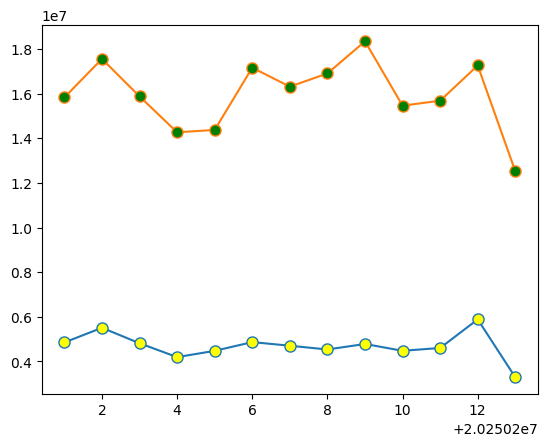

In [34]:

plt.plot(dates,HRX_GMV,marker='o',markerfacecolor='yellow',markersize=8)
plt.plot(dates,GMV,marker='o',markerfacecolor='green',markersize=8)
plt.show()